In [39]:
!pip install geopandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 9.6 MB/s eta 0:00:00:00:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 23.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 21.4 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 27.4 MB/s eta 0:00:0000:0100:01
  Using cached cligj-0.7.2-py3-none-any.whl (7.1 kB)
  Using cached click-8.1.3-py3-none-any.whl (96 kB)
  Using cached munch-2.5.0-py2.py3-none-any.whl (10 kB)
  Using cached click_plugins-1.1.1-py2.py3-none-any.whl (7.5 kB)


In [40]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import geopandas as gpd

In [18]:
df = pd.read_pickle('in_mig')
in_df = pd.DataFrame(df[-1], columns= ['migration', 'ifips', 'jfips'], dtype= int)

In [19]:
#show me first 5 rows
in_df.head()

,migration,ifips,jfips
0,72,1021,1001
1,52,1047,1001
2,466,1051,1001
3,46,1073,1001
4,19,1081,1001


In [12]:
# get the first 1000 rows
in_df = in_df[:1000]

# remove all the ones that have 0 migration
in_df = in_df[in_df['migration'] != 0]

In [13]:
# Create an empty directed graph
G = nx.DiGraph()

# Iterate through the rows in the DataFrame and add edges to the graph
for index, row in in_df.iterrows():
    source = int(row['ifips'])
    target = int(row['jfips'])
    weight = row['migration']
    G.add_edge(source, target, weight=weight)

# Print the graph's nodes and edges
print("Nodes:", G.nodes())
print("Edges:", G.edges(data=True))


Nodes: [1021, 1001, 1047, 1051, 1073, 1081, 1085, 1097, 1101, 1117, 8041, 1015, 1003, 1025, 1053, 1055, 1069, 1077, 1089, 1095, 1099, 1103, 1121, 1125, 1129, 6037, 6073, 12031, 12033, 12057, 12091, 12103, 12113, 13067, 13089, 13121, 13135, 17031, 22033, 22051, 22103, 28047, 28059, 32003, 47037, 47157, 48029, 48201, 48439, 1011, 1005, 1045, 1067, 1109, 1113, 13215, 13239, 1007, 1105, 1043, 1009, 1115, 1127, 1087, 1035, 1013, 1039, 1041, 1019, 1027, 1029, 1049, 1111, 13045, 1017, 1123, 13145, 13285, 13055, 13115, 13233, 1023, 1119, 28075, 1091, 1131, 1037, 13143, 1031, 1061, 12005, 15003, 36071, 37051, 47125, 48027, 1059, 1033, 1079, 28141, 12131, 1083, 1133, 2090, 13051, 21047, 36045, 48099, 48141, 53053, 1071, 13083, 13295, 47065, 1075, 1057, 1093, 28057, 12059, 1063, 1065, 12063, 12073, 12095, 12105, 13087, 13095, 13099, 47115, 4013, 4019, 5119, 6059, 6065, 6071, 6075, 11001, 12001, 12009, 12011, 12071, 12083, 12099, 12115, 12117, 12127, 13021, 13057, 13059, 13063, 13097, 13113, 13245

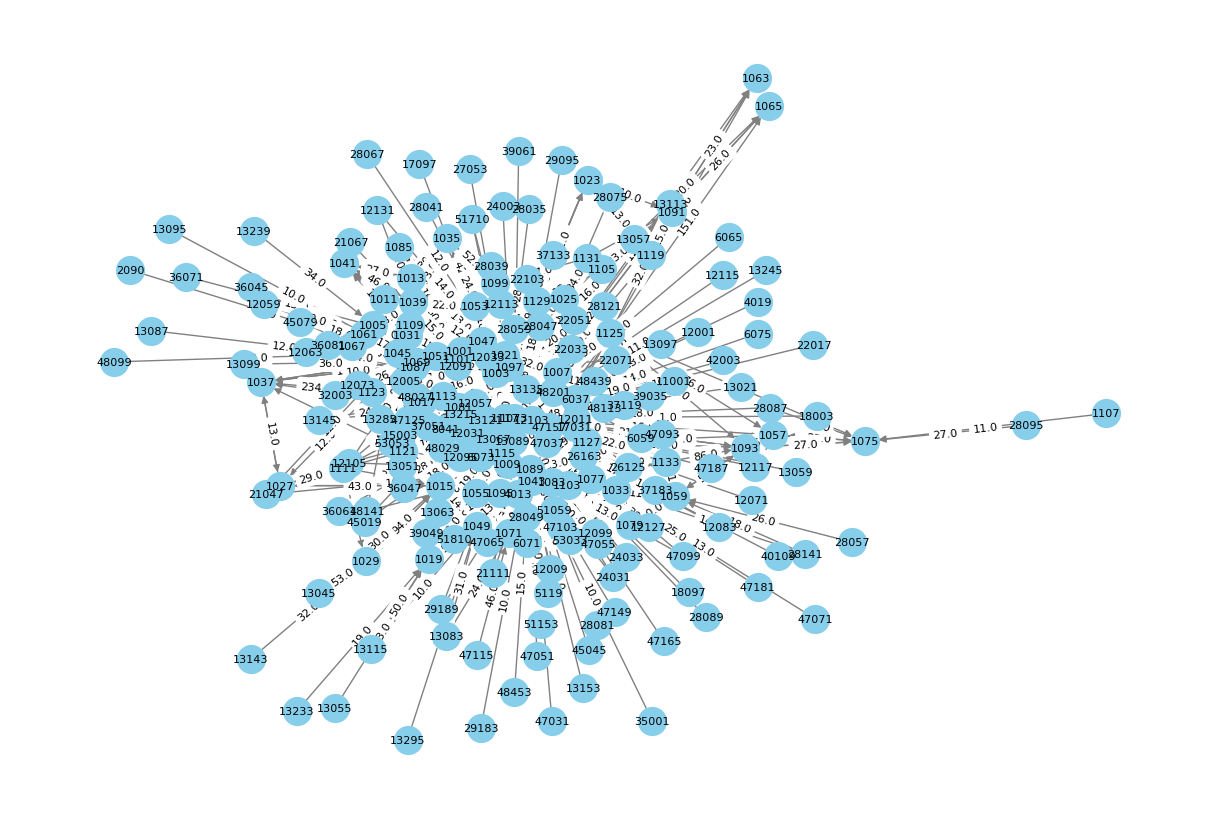

In [16]:
# Assuming G is your directed graph

# Set the figure size
plt.figure(figsize=(12, 8))

# Draw the graph
pos = nx.spring_layout(G, seed=42)  # Positions the nodes using the spring layout algorithm
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=400, edge_color='gray', arrows=True, font_size=8)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): f"{d['weight']}" for u, v, d in G.edges(data=True)}, font_size=8)

# Display the plot
plt.show()


## STATE level migrations  

In [32]:
# Rename the columns to match your actual column names if necessary
source_county_col = 'ifips'
target_county_col = 'jfips'
migration_col = 'migration'

# Define a function to extract the state FIPS code from a county FIPS code
def county_to_state_fips(county_fips):
    return int(str(county_fips).zfill(5)[:2])

# Create a new DataFrame with the state FIPS codes for each county FIPS code
in_df['source state'] = in_df[source_county_col].apply(county_to_state_fips)
in_df['target state'] = in_df[target_county_col].apply(county_to_state_fips)

# Group by source and target state FIPS codes and sum the migration values
state_migration = in_df.groupby(['source state', 'target state'])[migration_col].sum().reset_index()

# Rename the columns in the new DataFrame
state_migration.columns = ['source state', 'target state', 'migration']

# Display the new DataFrame
state_migration.head()


,source state,target state,migration
0,1,1,58426
1,1,2,34
2,1,4,231
3,1,5,38
4,1,6,798


In [33]:
# Mapping to names
state_fips_to_code = {
    1: 'AL', 2: 'AK', 4: 'AZ', 5: 'AR', 6: 'CA', 8: 'CO', 9: 'CT', 10: 'DE', 11: 'DC', 12: 'FL', 13: 'GA',
    15: 'HI', 16: 'ID', 17: 'IL', 18: 'IN', 19: 'IA', 20: 'KS', 21: 'KY', 22: 'LA', 23: 'ME', 24: 'MD',
    25: 'MA', 26: 'MI', 27: 'MN', 28: 'MS', 29: 'MO', 30: 'MT', 31: 'NE', 32: 'NV', 33: 'NH', 34: 'NJ',
    35: 'NM', 36: 'NY', 37: 'NC', 38: 'ND', 39: 'OH', 40: 'OK', 41: 'OR', 42: 'PA', 44: 'RI', 45: 'SC',
    46: 'SD', 47: 'TN', 48: 'TX', 49: 'UT', 50: 'VT', 51: 'VA', 53: 'WA', 54: 'WV', 55: 'WI', 56: 'WY'
}

In [34]:
# Convert the state FIPS codes to state codes
state_migration['source state'] = state_migration['source state'].map(state_fips_to_code)
state_migration['target state'] = state_migration['target state'].map(state_fips_to_code)

# remove all the ones that have 0 migration
state_migration = state_migration[state_migration['migration'] != 0]

# Display the new DataFrame
state_migration.head()

,source state,target state,migration
0,AL,AL,58426
1,AL,AK,34
2,AL,AZ,231
3,AL,AR,38
4,AL,CA,798


In [35]:
# Create an empty directed graph
G_state = nx.DiGraph()

# Iterate through the rows in the DataFrame and add edges to the graph
for index, row in state_migration.iterrows():
    source = row['source state']
    target = row['target state']
    weight = row['migration']
    G_state.add_edge(source, target, weight=weight)

# Print the graph's nodes and edges
print("Nodes:", G_state.nodes())
print("Edges:", G_state.edges(data=True))

Nodes: ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'DC', 'FL', 'GA', 'HI', 'IL', 'IN', 'KS', 'KY', 'LA', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'NE', 'NV', 'NY', 'NC', 'OH', 'OK', 'OR', 'PA', 'SC', 'TN', 'TX', 'UT', 'VA', 'WA', 'WI', 'CT', 'ID', 'ME', 'MT', 'NH', 'NJ', 'NM', 'ND', 'SD', 'WY', 'DE', 'IA', 'RI', 'VT', 'WV']
Edges: [('AL', 'AL', {'weight': 58426}), ('AL', 'AK', {'weight': 34}), ('AL', 'AZ', {'weight': 231}), ('AL', 'AR', {'weight': 38}), ('AL', 'CA', {'weight': 798}), ('AL', 'CO', {'weight': 225}), ('AL', 'DC', {'weight': 40}), ('AL', 'FL', {'weight': 4130}), ('AL', 'GA', {'weight': 6217}), ('AL', 'HI', {'weight': 109}), ('AL', 'IL', {'weight': 296}), ('AL', 'IN', {'weight': 88}), ('AL', 'KS', {'weight': 95}), ('AL', 'KY', {'weight': 99}), ('AL', 'LA', {'weight': 502}), ('AL', 'MD', {'weight': 105}), ('AL', 'MA', {'weight': 64}), ('AL', 'MI', {'weight': 255}), ('AL', 'MN', {'weight': 11}), ('AL', 'MS', {'weight': 1235}), ('AL', 'MO', {'weight': 76}), ('AL', 'NE', {'weight': 10}), (

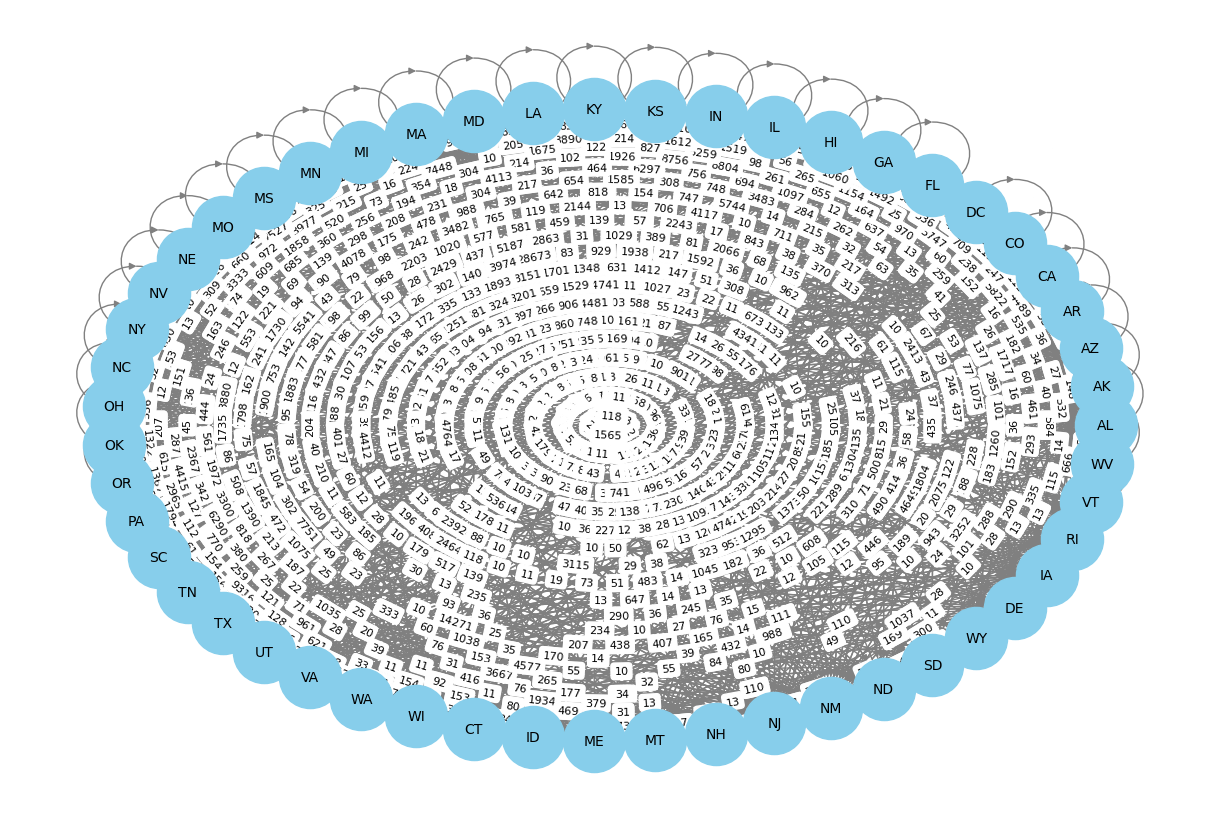

In [36]:
# Set the figure size
plt.figure(figsize=(12, 8))

# Choose a layout algorithm
pos = nx.circular_layout(G_state)

# Draw the graph
nx.draw(G_state, pos, with_labels=True, node_color='skyblue', node_size=2000, edge_color='gray', arrows=True, font_size=10)
nx.draw_networkx_edge_labels(G_state, pos, edge_labels={(u, v): f"{d['weight']}" for u, v, d in G_state.edges(data=True)}, font_size=8)

# Display the plot
plt.show()


### Top edges 

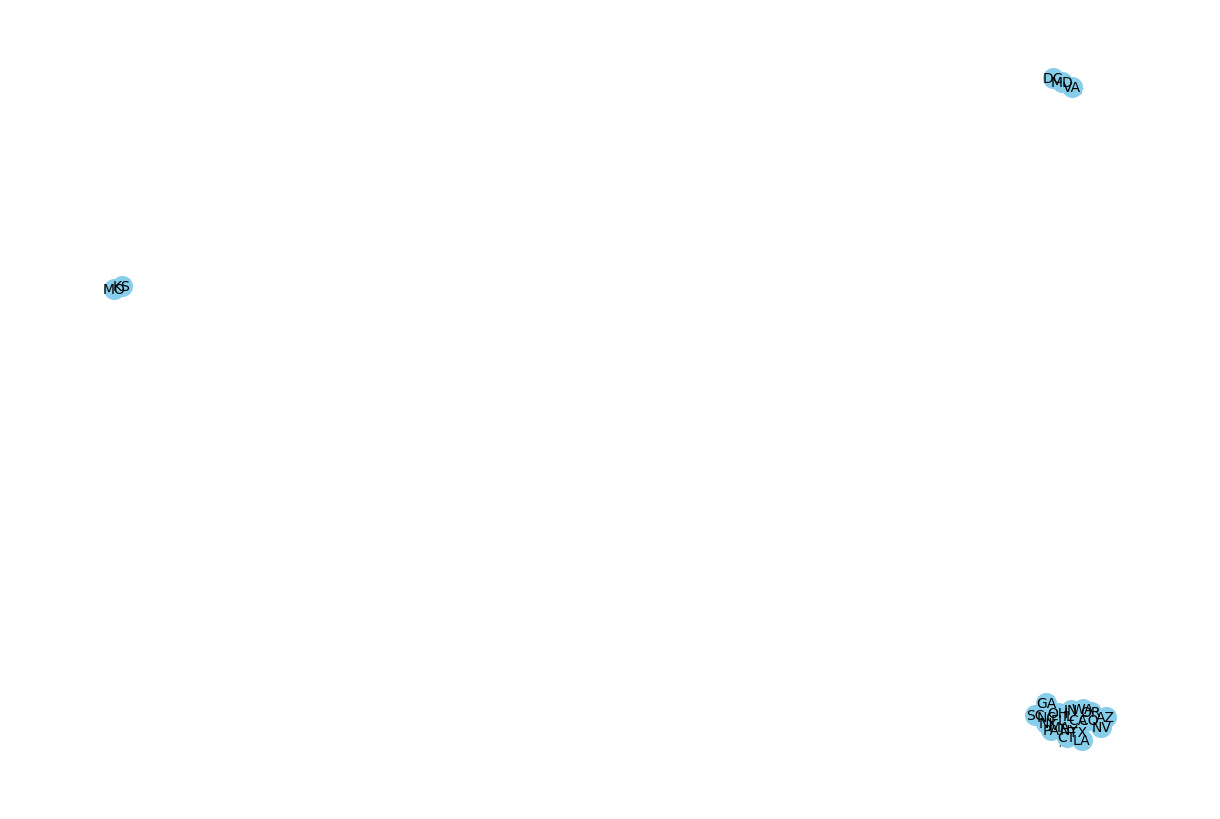

In [52]:
def top_n_edges(G, n):
    sorted_edges = sorted(
        ((u, v, d) for u, v, d in G.edges(data=True) if u != v),
        key=lambda x: x[2]['weight'],
        reverse=True,
    )
    return sorted_edges[:n]

# Choose a number of top edges to display
n_top_edges = 50

# Create a new graph with the top n edges
G_filtered = nx.DiGraph()
G_filtered.add_edges_from(top_n_edges(G_state, n_top_edges))

# Set the figure size
plt.figure(figsize=(12, 8))

# Choose the Kamada-Kawai force-directed layout algorithm
pos = nx.kamada_kawai_layout(G_filtered, weight='weight')

# Draw the filtered graph
nx.draw(G_filtered, pos, with_labels=True, node_color='skyblue', node_size=200, edge_color='gray', arrows=True, font_size=10)
nx.draw_networkx_edge_labels(G_filtered, pos, edge_labels={(u, v): f"{d['weight']}" for u, v, d in G_filtered.edges(data=True)}, font_size=8)

# Display the plot
plt.show()


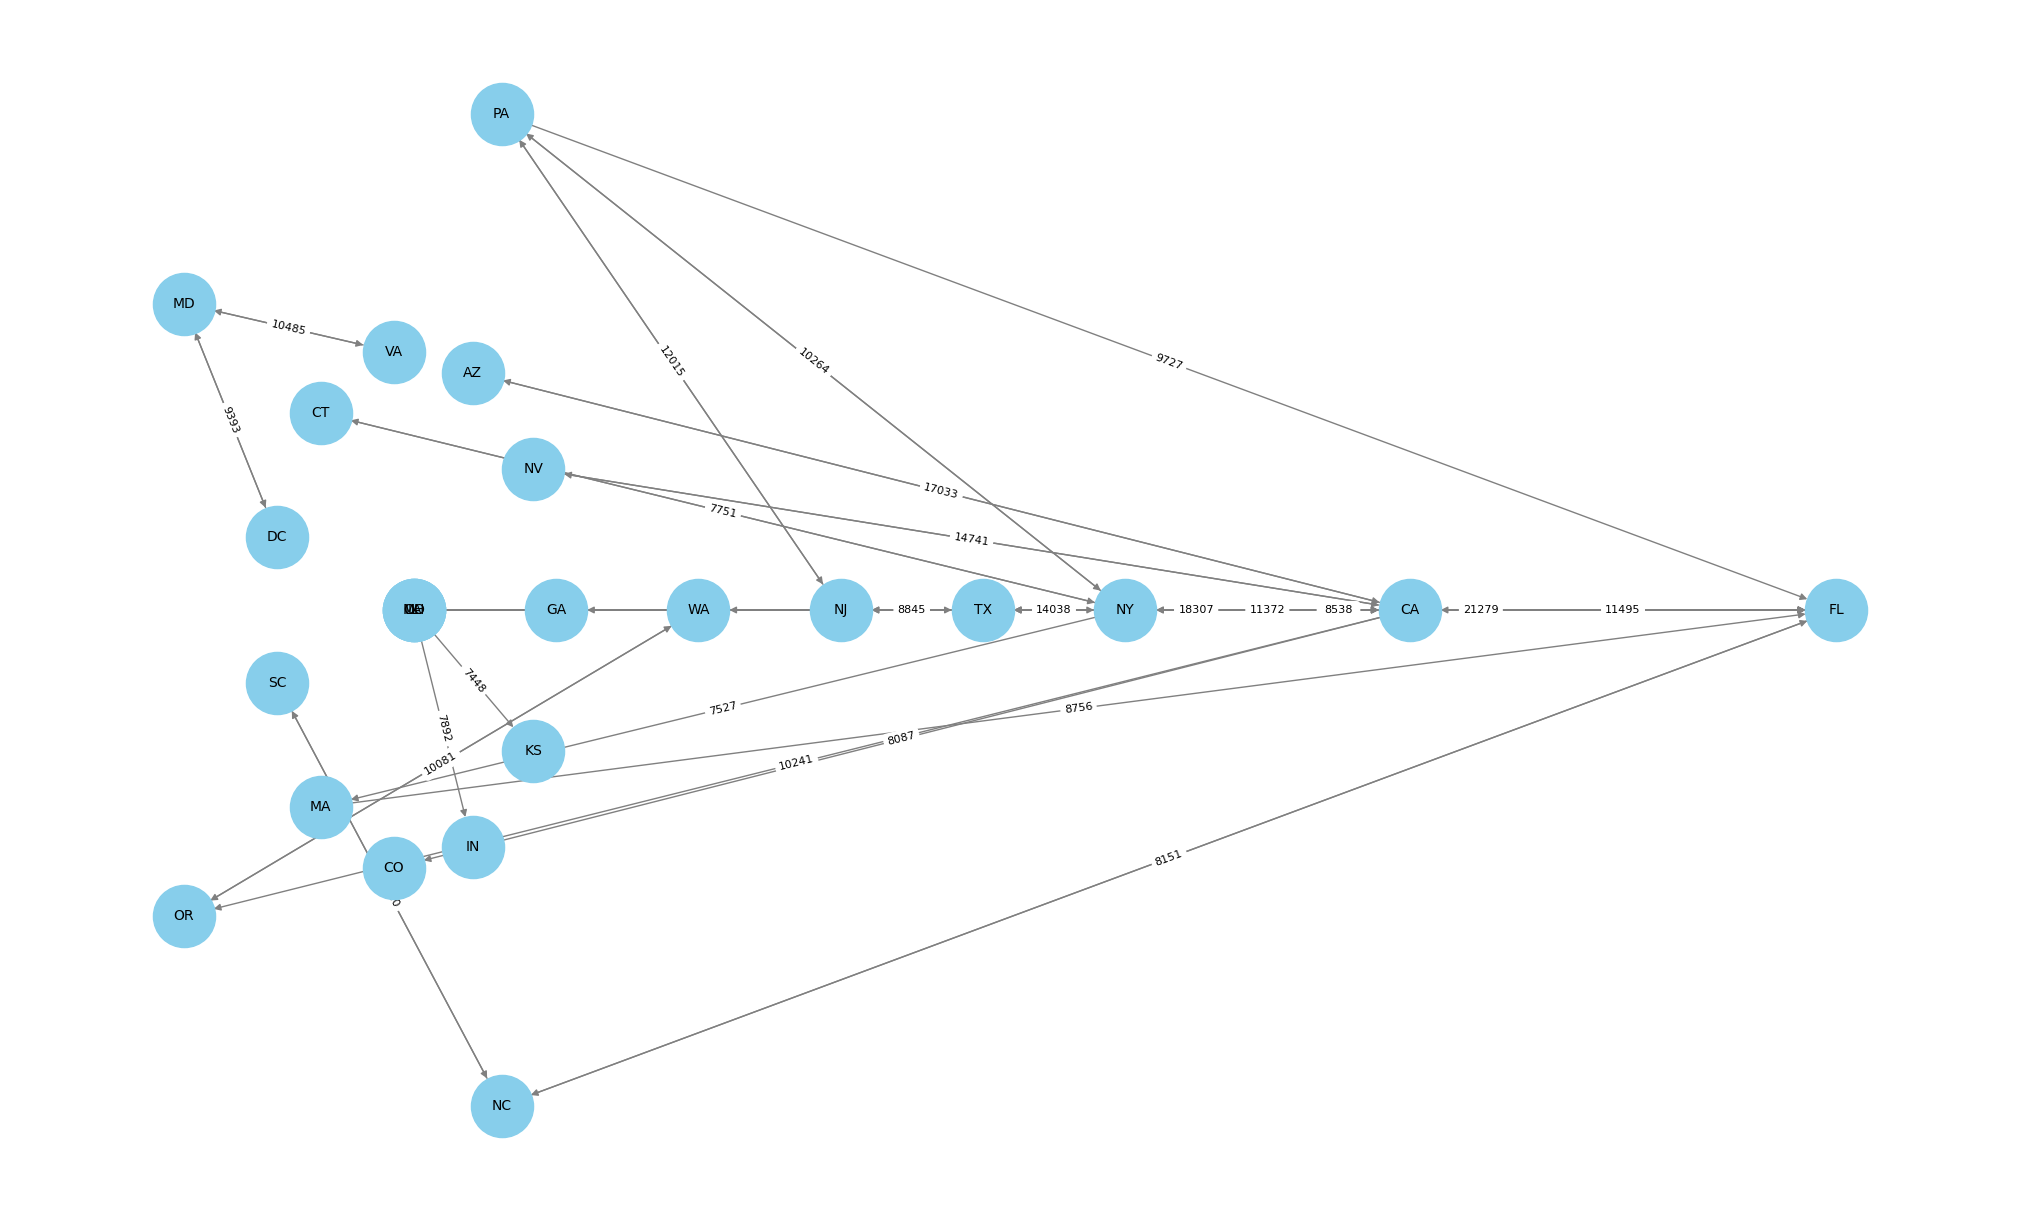

In [64]:
def custom_layout(G):
    nodes_in_degree = G.in_degree()
    max_in_degree = max(d for n, d in nodes_in_degree)
    nodes_by_degree = {i: [] for i in range(max_in_degree + 1)}
    for n, d in nodes_in_degree:
        nodes_by_degree[d].append(n)

    pos = {}
    for degree, nodes in nodes_by_degree.items():
        n_nodes = len(nodes)
        theta = np.linspace(0, 2 * np.pi, n_nodes + 1)[:-1]
        x = np.cos(theta) * degree
        y = np.sin(theta) * degree
        pos.update({n: (xi, yi) for n, xi, yi in zip(nodes, x, y)})

    return pos

# Set the figure size
plt.figure(figsize=(20, 12))

# Choose the custom layout
pos = custom_layout(G_filtered)

# Draw the filtered graph
nx.draw(G_filtered, pos, with_labels=True, node_color='skyblue', node_size=2000, edge_color='gray', arrows=True, font_size=10)
nx.draw_networkx_edge_labels(G_filtered, pos, edge_labels={(u, v): f"{d['weight']}" for u, v, d in G_filtered.edges(data=True)}, font_size=8)

# Display the plot
plt.show()
